<a href="https://colab.research.google.com/github/DataGF/Coursera_Capstone/blob/main/%5BNOTEBOOK_VALENDO1%5D_aplied_data_science_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index
- **[Part 1](#part1)**
- **[Part 2](#part2)**
- **[Part 3](#part3)**
- **[Part 4](#part4)**

<a name='part1'></a>
# Part 1

There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas  to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

[Hints for Web Scraping](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/NewLinkWebscrapingHints.md).

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.



In [ ]:
# import libraries, modules and classes

import requests # library to handle requests
import pandas as pd # library for data analysis
import folium # library for map plotting
import numpy as np # library to handle data in a vectorized manner
import matplotlib.pyplot as plt # library to handle graphical plots
import seaborn as sns # library to handle graphical plots

from bs4 import BeautifulSoup # module to webscrape data
from geopy.geocoders import Nominatim # class to convert an address into latitude and longitude values
from sklearn.cluster import KMeans # class to make Kmeans clusterization
from matplotlib import cm # module to color maps
from matplotlib import colors # module of the named colors supported in matplotlib


In [ ]:
# request data from wikipedia

html_toronto_postal_codes = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').content
html_toronto_postal_codes


b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of postal codes of Canada: M - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"8d060b2b-e24d-4055-9252-098befc626eb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":1019189119,"wgRevisionId":1019189119,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Wikipedia semi-prote

In [ ]:
# uses the html parser of the BeautifulSoup module and prints the site structure

soup = BeautifulSoup(html_toronto_postal_codes, 'html.parser')
# print(soup.prettify()) --> used to understand the document structure


In [ ]:
# find table and print its structure

table = soup.find('table')
# print(table.prettify()) --> used to understand the document structure


In [ ]:
# ignore 'Not assigned' values and search for first 3 values to get postal code

for row in table.findAll('td'):
    if row.span.text == 'Not assigned':
        pass
    else:
        print(row.p.text[:3])


M3A
M4A
M5A
M6A
M7A
M9A
M1B
M3B
M4B
M5B
M6B
M9B
M1C
M3C
M4C
M5C
M6C
M9C
M1E
M4E
M5E
M6E
M1G
M4G
M5G
M6G
M1H
M2H
M3H
M4H
M5H
M6H
M1J
M2J
M3J
M4J
M5J
M6J
M1K
M2K
M3K
M4K
M5K
M6K
M1L
M2L
M3L
M4L
M5L
M6L
M9L
M1M
M2M
M3M
M4M
M5M
M6M
M9M
M1N
M2N
M3N
M4N
M5N
M6N
M9N
M1P
M2P
M4P
M5P
M6P
M9P
M1R
M2R
M4R
M5R
M6R
M7R
M9R
M1S
M4S
M5S
M6S
M1T
M4T
M5T
M1V
M4V
M5V
M8V
M9V
M1W
M4W
M5W
M8W
M9W
M1X
M4X
M5X
M8X
M4Y
M7Y
M8Y
M8Z


In [ ]:
# ignore 'Not assigned' values, and treat data to get bourough

for row in table.findAll('td'):
    if row.span.text == 'Not assigned':
        pass
    else:
        print((row.p.text).split('(')[0][3:])


North York
North York
Downtown Toronto
North York
Queen's Park
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East YorkEast Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
MississaugaCanada Post Gateway Processing Centre
Etobicoke
Scarboroug

In [ ]:
# ignore 'Not assigned' values, and treat data to get neighborhood

for row in table.findAll('td'):
    if row.span.text == 'Not assigned':
        pass
    else:
        print((((((row.span.text).split('(')[1]).strip(')')).replace('/', ',')).replace(')', ' ')).strip(' '))


Parkwoods
Victoria Village
Regent Park , Harbourfront
Lawrence Manor , Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern , Rouge
Don Mills North
Parkview Hill , Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale
Rouge Hill , Port Union , Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate , Bloordale Gardens , Old Burnhamthorpe , Markland Wood
Guildwood , Morningside , West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor , Wilson Heights , Downsview North
Thorncliffe Park
Richmond , Adelaide , King
Dufferin , Dovercourt Village
Scarborough Village
Fairview , Henry Farm , Oriole
Northwood Park , York University
The Danforth  East
Harbourfront East , Union Station , Toronto Islands
Little Portugal , Trinity
Kennedy Park , Ionview , East Birchmount Park
Bayview Village

In [ ]:
# combine the above loops to get postal code, bourough and neighborhood extract data function

def extract_data(table):
    table_data_list = []
    for row in table.findAll('td'):
        table_data_dict = {}
        if row.span.text=='Not assigned':
            pass            
        else:
            table_data_dict['PostalCode'] = row.p.text[:3]
            table_data_dict['Borough'] = (row.span.text).split('(')[0]
            table_data_dict['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
            table_data_list.append(table_data_dict)
    return table_data_list
     

In [ ]:
# extracts the required data (postal code, borough, neighborhood) using the function defined in the previous step

toronto_pbn = extract_data(table)
toronto_pbn


[{'Borough': 'North York', 'Neighborhood': 'Parkwoods', 'PostalCode': 'M3A'},
 {'Borough': 'North York',
  'Neighborhood': 'Victoria Village',
  'PostalCode': 'M4A'},
 {'Borough': 'Downtown Toronto',
  'Neighborhood': 'Regent Park, Harbourfront',
  'PostalCode': 'M5A'},
 {'Borough': 'North York',
  'Neighborhood': 'Lawrence Manor, Lawrence Heights',
  'PostalCode': 'M6A'},
 {'Borough': "Queen's Park",
  'Neighborhood': 'Ontario Provincial Government',
  'PostalCode': 'M7A'},
 {'Borough': 'Etobicoke',
  'Neighborhood': 'Islington Avenue',
  'PostalCode': 'M9A'},
 {'Borough': 'Scarborough',
  'Neighborhood': 'Malvern, Rouge',
  'PostalCode': 'M1B'},
 {'Borough': 'North York',
  'Neighborhood': 'Don Mills North',
  'PostalCode': 'M3B'},
 {'Borough': 'East York',
  'Neighborhood': 'Parkview Hill, Woodbine Gardens',
  'PostalCode': 'M4B'},
 {'Borough': 'Downtown Toronto',
  'Neighborhood': 'Garden District, Ryerson',
  'PostalCode': 'M5B'},
 {'Borough': 'North York', 'Neighborhood': 'Glenca

In [ ]:
# define and print required dataframe and treat some borough data

df_toronto_pbn = pd.DataFrame(toronto_pbn, columns=['PostalCode', 'Borough', 'Neighborhood'])
df_toronto_pbn['Borough'] = df_toronto_pbn['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                                               'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                                               'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                                               'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df_toronto_pbn.head(12)


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [ ]:
# Print number of rows and columns using .shape method

print(f'Number of rows:    {df_toronto_pbn.shape[0]}\nNumber of columns: {df_toronto_pbn.shape[1]}')


Number of rows:    103
Number of columns: 3


Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking  postal code M5G as an example, your code would look something like this:

```
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]
```

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: 

[GeoSpatial Dataset](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv)

**Important Note**: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

In [ ]:
! pip install geocoder # --> run it if not installed

import geocoder

print('Successfully imported geocoder')

     |████████████████████████████████| 102kB 6.2MB/s 
Successfully imported geocoder


In [ ]:
# define get_lat_lng function to get latitude and longitude as proposed above

def get_lat_lng(postal_code):

    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    
    return latitude, longitude

get_lat_lng('M5G')


KeyboardInterrupt: ignored

The above function with proposed code had failed, so I had to use the provided geospatial data.

In [ ]:
# load provided geospatial data

df_geospatial_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
df_geospatial_data.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [ ]:
# rename columns to merge on the next step

df_geospatial_data.rename(columns={'Postal Code':'PostalCode'}, inplace=True)
df_geospatial_data.head()


,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [ ]:
# merge above table with previous table

df_toronto_geo_merged = pd.merge(df_geospatial_data, df_toronto_pbn, on='PostalCode')
df_toronto_geo_merged_sorted = df_toronto_geo_merged.sort_values(by=['PostalCode'])
df_toronto_geo_merged_sorted


,PostalCode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae
...,...,...,...,...,...
98,M9N,43.706876,-79.518188,York,Weston
99,M9P,43.696319,-79.532242,Etobicoke,Westmount
100,M9R,43.688905,-79.554724,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,43.739416,-79.588437,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [ ]:
# adjust features order

df_toronto_geo_merged_adjusted = df_toronto_geo_merged[['PostalCode','Borough', 'Neighborhood', 'Latitude', 'Longitude']]
df_toronto_geo_merged_adjusted


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [ ]:
# function definition to get Toronto's latitude and longitude

def get_lat_lng_2(local):

    local = local

    geolocator = Nominatim(user_agent='toronto_explorer')
    toronto_coordinates = geolocator.geocode(local)
    latitude = toronto_coordinates.latitude
    longitude = toronto_coordinates.longitude

    return latitude, longitude


In [ ]:
# Toronto's latitude and longitude

toronto_latitude = get_lat_lng_2("Toronto, ON")[0]
toronto_longitude = get_lat_lng_2("Toronto, ON")[1]

print(f'Toronto\'s latitude: {toronto_latitude}\nToronto\'s longitude: {toronto_longitude}')


Toronto's latitude: 43.6534817
Toronto's longitude: -79.3839347


In [ ]:
# plot Toronto's map

toronto_map = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=10)
toronto_map


In [ ]:
# plot Toronto's map with neighborhoods

for lat, lng, borough, neighborhood in zip(df_toronto_geo_merged_adjusted['Latitude'],
                                           df_toronto_geo_merged_adjusted['Longitude'],
                                           df_toronto_geo_merged_adjusted['Borough'],
                                           df_toronto_geo_merged_adjusted['Neighborhood']):
    label = '{}; {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)

toronto_map


<a name='part2'></a>
# Part 2

In [ ]:
# credentials and parameters to access foursquare

CLIENT_ID = 'I0YS5HWJXQKLGON4AUU3Z5O3BKOTJYX13ZCRAXMWBTYPIW3E' # your Foursquare ID
CLIENT_SECRET = 'WOD0QZQVLHWA3Z3X0JJOFSSAZXWPCSGR31ZKVRHHJMP1TVKN' # your Foursquare Secret
ACCESS_TOKEN = 'YUKJKHGORFLVPOVVRHXXXMCL1MMNLIG43LB5ZFTF52X5SMN0' # your FourSquare Access Token
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: I0YS5HWJXQKLGON4AUU3Z5O3BKOTJYX13ZCRAXMWBTYPIW3E
CLIENT_SECRET:WOD0QZQVLHWA3Z3X0JJOFSSAZXWPCSGR31ZKVRHHJMP1TVKN


In [ ]:
# fetch foursquare category hierarchy

url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(CLIENT_ID, 
                                                                                                   CLIENT_SECRET, 
                                                                                                   VERSION)

category_results = requests.get(url).json()


In [ ]:
# foursquare category hierarchy

category_results


{'meta': {'code': 200, 'requestId': '6081edf8a9c3de182ef8f3a5'},
 'response': {'categories': [{'categories': [{'categories': [],
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater'},
     {'categories': [],
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium'},
     {'categories': [],
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/arcade_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1e1931735',
      'name': 'Arcade',
      'pluralName': 'Arcades',
      'shortName': 'Arcade'},
     {'categories': [],
      'icon': {'prefix': 'https://ss3

In [ ]:
# print the structure and number of items from foursquare category hierarchy

for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))
    

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 16373


In [ ]:
# define category list

category_list = category_results['response']['categories']
category_list


[{'categories': [{'categories': [],
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'id': '56aa371be4b08b9a8d5734db',
    'name': 'Amphitheater',
    'pluralName': 'Amphitheaters',
    'shortName': 'Amphitheater'},
   {'categories': [],
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
     'suffix': '.png'},
    'id': '4fceea171983d5d06c3e9823',
    'name': 'Aquarium',
    'pluralName': 'Aquariums',
    'shortName': 'Aquarium'},
   {'categories': [],
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/arcade_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d1e1931735',
    'name': 'Arcade',
    'pluralName': 'Arcades',
    'shortName': 'Arcade'},
   {'categories': [],
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/artgallery_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d1e2931735',
    'name': 'A

In [ ]:
# length of category list

print(f'Length of category list: {len(category_list)} items')


Length of category list: 10 items


In [ ]:
# print IDs and category names

for data in category_list:
    print(f'ID: {data["id"]}, Category: {data["name"]}')


ID: 4d4b7104d754a06370d81259, Category: Arts & Entertainment
ID: 4d4b7105d754a06372d81259, Category: College & University
ID: 4d4b7105d754a06373d81259, Category: Event
ID: 4d4b7105d754a06374d81259, Category: Food
ID: 4d4b7105d754a06376d81259, Category: Nightlife Spot
ID: 4d4b7105d754a06377d81259, Category: Outdoors & Recreation
ID: 4d4b7105d754a06375d81259, Category: Professional & Other Places
ID: 4e67e38e036454776db1fb3a, Category: Residence
ID: 4d4b7105d754a06378d81259, Category: Shop & Service
ID: 4d4b7105d754a06379d81259, Category: Travel & Transport


In [ ]:
# check parent ID and returns all categories if it is false
# this function you flatten a parent ID category

def flatten_data(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_data(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_data(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict


In [ ]:
# define category dictionary by taking the parent ID and returning 'name' and 'id' of all the sub-categories of Food

category_dict = flatten_data(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')
category_dict


{'4bf58dd8d48988d107941735': 'Argentinian Restaurant',
 '4bf58dd8d48988d108941735': 'Dumpling Restaurant',
 '4bf58dd8d48988d109941735': 'Eastern European Restaurant',
 '4bf58dd8d48988d10a941735': 'Ethiopian Restaurant',
 '4bf58dd8d48988d10b941735': 'Falafel Restaurant',
 '4bf58dd8d48988d10c941735': 'French Restaurant',
 '4bf58dd8d48988d10d941735': 'German Restaurant',
 '4bf58dd8d48988d10e941735': 'Greek Restaurant',
 '4bf58dd8d48988d10f941735': 'Indian Restaurant',
 '4bf58dd8d48988d110941735': 'Italian Restaurant',
 '4bf58dd8d48988d111941735': 'Japanese Restaurant',
 '4bf58dd8d48988d112941735': 'Juice Bar',
 '4bf58dd8d48988d113941735': 'Korean Restaurant',
 '4bf58dd8d48988d115941735': 'Middle Eastern Restaurant',
 '4bf58dd8d48988d120951735': 'Food Court',
 '4bf58dd8d48988d128941735': 'Cafeteria',
 '4bf58dd8d48988d142941735': 'Asian Restaurant',
 '4bf58dd8d48988d143941735': 'Breakfast Spot',
 '4bf58dd8d48988d144941735': 'Caribbean Restaurant',
 '4bf58dd8d48988d145941735': 'Chinese Resta

<a name='part3'></a>
# Part 3

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 

Just make sure:

1. to add enough Markdown cells to explain what you decided to do and to report any observations you make. 
2. to generate maps to visualize your neighborhoods and how they cluster together.

In [ ]:
# find first name of toronto dataframe neighborhood

df_toronto_geo_merged_adjusted.loc[0, 'Neighborhood']


'Malvern, Rouge'

In [ ]:
# print five first rows of toronto's geospatial data

df_toronto_geo_merged_adjusted.head()


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [ ]:
# print number of boroughs and neighborhoods

print('The toronto\'s geospatial dataframe has {} boroughs and {} neighborhoods'.format(len(df_toronto_geo_merged_adjusted['Borough'].unique()),
                                                                                             df_toronto_geo_merged_adjusted.shape[0]))


The toronto's geospatial dataframe has 15 boroughs and 103 neighborhoods


In [ ]:
# Malvern, Rouge latitude and longitude coordinates

neighborhood_latitude = df_toronto_geo_merged_adjusted.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto_geo_merged_adjusted.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_toronto_geo_merged_adjusted.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Malvern, Rouge are 43.806686299999996, -79.19435340000001.


In [ ]:
# create the GET request URL to search for venue with requested category ID

LIMIT = 1 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)

url # display URL


'https://api.foursquare.com/v2/venues/search?&client_id=I0YS5HWJXQKLGON4AUU3Z5O3BKOTJYX13ZCRAXMWBTYPIW3E&client_secret=WOD0QZQVLHWA3Z3X0JJOFSSAZXWPCSGR31ZKVRHHJMP1TVKN&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=500&categoryId=4d4b7105d754a06374d81259&limit=1'

In [ ]:
# request data from foursquare API

results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '6081f13be56eec0c3f3a1e04'},
 'response': {'confident': False,
  'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'primary': True,
      'shortName': 'Fast Food'}],
    'hasPerk': False,
    'id': '4bb6b9446edc76b0d771311c',
    'location': {'cc': 'CA',
     'city': 'Toronto',
     'country': 'Canada',
     'crossStreet': 'Morningside & Sheppard',
     'distance': 387,
     'formattedAddress': ['Toronto ON', 'Canada'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.80744841934756,
       'lng': -79.19905558052072}],
     'lat': 43.80744841934756,
     'lng': -79.19905558052072,
     'state': 'ON'},
    'name': 'Wendy’s',
    'referralId': 'v-1619128635'}]}}

In [ ]:
# show response data of a especific venue

results['response']['venues']


[{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d16e941735',
    'name': 'Fast Food Restaurant',
    'pluralName': 'Fast Food Restaurants',
    'primary': True,
    'shortName': 'Fast Food'}],
  'hasPerk': False,
  'id': '4bb6b9446edc76b0d771311c',
  'location': {'cc': 'CA',
   'city': 'Toronto',
   'country': 'Canada',
   'crossStreet': 'Morningside & Sheppard',
   'distance': 387,
   'formattedAddress': ['Toronto ON', 'Canada'],
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.80744841934756,
     'lng': -79.19905558052072}],
   'lat': 43.80744841934756,
   'lng': -79.19905558052072,
   'state': 'ON'},
  'name': 'Wendy’s',
  'referralId': 'v-1619128635'}]

In [ ]:
# create a category id parameter (string) and print it separated by comma

category_id_list = []

for key, value in category_dict.items():
    category_id_list.append(key)
category_id = ','.join(category_id_list)

print(category_id)


4d4b7105d754a06374d81259,503288ae91d4c4b30a586d67,4bf58dd8d48988d1c8941735,4bf58dd8d48988d10a941735,5f2c344a5b4c177b9a6dc011,4bf58dd8d48988d14e941735,4bf58dd8d48988d157941735,5f2c2b7db6d05514c7044837,4bf58dd8d48988d142941735,56aa371be4b08b9a8d573568,52e81612bcbc57f1066b7a03,4bf58dd8d48988d145941735,52af3a5e3cf9994f4e043bea,52af3a723cf9994f4e043bec,52af3a7c3cf9994f4e043bed,58daa1558bbb0b01f18ec1d3,52af3a673cf9994f4e043beb,52af3a903cf9994f4e043bee,4bf58dd8d48988d1f5931735,52af3a9f3cf9994f4e043bef,52af3aaa3cf9994f4e043bf0,52af3ab53cf9994f4e043bf1,52af3abe3cf9994f4e043bf2,52af3ac83cf9994f4e043bf3,52af3ad23cf9994f4e043bf4,52af3add3cf9994f4e043bf5,52af3af23cf9994f4e043bf7,52af3ae63cf9994f4e043bf6,52af3afc3cf9994f4e043bf8,52af3b053cf9994f4e043bf9,52af3b213cf9994f4e043bfa,52af3b293cf9994f4e043bfb,52af3b343cf9994f4e043bfc,52af3b3b3cf9994f4e043bfd,52af3b463cf9994f4e043bfe,52af3b633cf9994f4e043c01,52af3b513cf9994f4e043bff,52af3b593cf9994f4e043c00,52af3b6e3cf9994f4e043c02,52af3b773cf9994f4e043c03,

In [ ]:
# function to loop neighborhoods to:
# - create API request URL with radius=1000 and limit=500
# - make GET request for food category (with a food category id)
# - for each neighborhood the function will return information for each nearby venue
# - append nearby venues to a list
# - unfold the items list with a list comprehension and transform them into a dataframe
# - organize the columns names

def getNearbyFood(names, latitudes, longitudes, radius=1000, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)


In [ ]:
# use pickle library to serialize the information retrieved from the GET request. This step will counter any redundant requests to the Foursquare API

import pickle # to serialize and deserialize a Python object structure

try:  
    with open('toronto_food_venues.pkl', 'rb') as f:
        toronto_venues = pickle.load(f)
    print("--> Dataframe Already Exist <--")

except:
    toronto_venues = getNearbyFood(names=df_toronto_geo_merged_adjusted['Neighborhood'],
                                   latitudes=df_toronto_geo_merged_adjusted['Latitude'],
                                   longitudes=df_toronto_geo_merged_adjusted['Longitude'])
    with open('toronto_food_venues.pkl', 'wb') as f:
        pickle.dump(toronto_venues, f)
    print("--> Dataframe Created <--")


***Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Done*** with 0 venues with incompelete information.
--> Dataframe Created <--


In [ ]:
# show five first rows of toronto venues

toronto_venues.head()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Tim Hortons,43.802000,-79.198169,Coffee Shop
1,"Malvern, Rouge",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
2,"Malvern, Rouge",43.806686,-79.194353,Subway,43.801095,-79.200304,Sandwich Place
3,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
4,"Malvern, Rouge",43.806686,-79.194353,Second Cup,43.802165,-79.196114,Coffee Shop


In [ ]:
# print the number of entries (rows) and features (columns) of toronto venues dataframe

print(f'Toronto venues dataframe ROWS:    {toronto_venues.shape[0]}\nToronto venues dataframe COLUMNS: {toronto_venues.shape[1]}')


Toronto venues dataframe ROWS:    4281
Toronto venues dataframe COLUMNS: 7


In [ ]:
# print unique venues categories

print(f'Number of unique categories: {len(toronto_venues["Venue Category"].unique())}')


Number of unique categories: 158


In [ ]:
# show categories venues and its quantity

pd.set_option("display.max_rows", None, "display.max_columns", None)
toronto_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)


Venue Category
Coffee Shop                      600
Pizza Place                      266
Café                             244
Restaurant                       205
Bakery                           201
Fast Food Restaurant             185
Chinese Restaurant               160
Sandwich Place                   136
Italian Restaurant               108
Caribbean Restaurant             100
Bubble Tea Shop                   94
Indian Restaurant                 87
Sushi Restaurant                  84
Grocery Store                     82
Burger Joint                      81
Fried Chicken Joint               72
Breakfast Spot                    69
Asian Restaurant                  68
Middle Eastern Restaurant         63
Ice Cream Shop                    62
Japanese Restaurant               58
Thai Restaurant                   52
Vietnamese Restaurant             51
BBQ Joint                         50
Mexican Restaurant                49
Dessert Shop                      47
Deli / Bodega          

In [ ]:
# show all unique categories

unique_categories = toronto_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in categories))


Coffee Shop, Fast Food Restaurant, Sandwich Place, Fried Chicken Joint, Greek Restaurant, Filipino Restaurant, Caribbean Restaurant, Restaurant, Chinese Restaurant, African Restaurant, Indian Restaurant, Bakery, Burger Joint, Fish & Chips Shop, BBQ Joint, Café, German Restaurant, Japanese Restaurant, Pizza Place, Italian Restaurant, Breakfast Spot, Mexican Restaurant, Shawarma Place, Donut Shop, Grocery Store, Sports Bar, Salad Place, Korean BBQ Restaurant, Vegetarian / Vegan Restaurant, French Restaurant, Juice Bar, Snack Place, South Indian Restaurant, Thai Restaurant, Hakka Restaurant, Asian Restaurant, Wings Joint, Halal Restaurant, Korean Restaurant, Food Court, Sushi Restaurant, Dessert Shop, Ice Cream Shop, Food Truck, Middle Eastern Restaurant, Sri Lankan Restaurant, Deli / Bodega, Steakhouse, Diner, Falafel Restaurant, Gastropub, American Restaurant, Tea Room, Cajun / Creole Restaurant, Harbor / Marina, Bangladeshi Restaurant, Bistro, Pakistani Restaurant, Hot Dog Joint, Vietn

In [ ]:
client_selected_food_venues = ['Caribbean Restaurant', 'Chinese Restaurant', 'Indian Restaurant', 'African Restaurant', 'Filipino Restaurant', 'Greek Restaurant', 'German Restaurant', 'Japanese Restaurant', 'Italian Restaurant', 'Mexican Restaurant',
                               'Korean BBQ Restaurant', 'French Restaurant', 'South Indian Restaurant', 'Vegetarian / Vegan Restaurant', 'Thai Restaurant', 'Asian Restaurant', 'Hakka Restaurant', 'Halal Restaurant', 'Sushi Restaurant', 'Korean Restaurant',
                               'Middle Eastern Restaurant', 'Sri Lankan Restaurant', 'Falafel Restaurant', 'American Restaurant', 'Bangladeshi Restaurant', 'Pakistani Restaurant', 'Vietnamese Restaurant', 'North Indian Restaurant', 'Kebab Restaurant',
                               'Afghan Restaurant', 'Seafood Restaurant', 'Iraqi Restaurant', 'Cantonese Restaurant', 'Hong Kong Restaurant', 'Malay Restaurant', 'Taiwanese Restaurant', 'Dumpling Restaurant', 'Szechuan Restaurant', 'Ramen Restaurant',
                               'Udon Restaurant', 'Mediterranean Restaurant', 'Dim Sum Restaurant', 'Eastern European Restaurant', 'New American Restaurant', 'South American Restaurant', 'Persian Restaurant', 'Doner Restaurant', 'Tapas Restaurant',
                               'Cuban Restaurant', 'Brazilian Restaurant', 'Modern European Restaurant', 'Caucasian Restaurant', 'Latin American Restaurant', 'Turkish Restaurant', 'Portuguese Restaurant', 'Russian Restaurant', 'Bosnian Restaurant',
                               'Moroccan Restaurant', 'Ethiopian Restaurant', 'Venezuelan Restaurant', 'Egyptian Restaurant', 'Syrian Restaurant', 'Tibetan Restaurant', 'Belgian Restaurant', 'Kosher Restaurant', 'Lebanese Restaurant', 'Dutch Restaurant',
                               'Peruvian Restaurant', 'Colombian Restaurant', 'Empanada Restaurant', 'Indian Chinese Restaurant', 'Argentinian Restaurant', 'Hungarian Restaurant', 'Burmese Restaurant', 'Polish Restaurant', 'Scandinavian Restaurant',
                               'Swiss Restaurant', 'Cajun / Creole Restaurant']

In [ ]:
client_not_interested_food_venues = ['Coffee Shop', 'Sandwich Place', 'Fast Food Restaurant', 'Fried Chicken Joint', 'Restaurant', 'Bakery', 'Burger Joint', 'Breakfast Spot', 'Fish & Chips Shop', 'Café', 'BBQ Joint', 'Pizza Place', 'Shawarma Place', 
                                     'Donut Shop', 'Grocery Store', 'Salad Place', 'Sports Bar', 'Juice Bar', 'Snack Place', 'Wings Joint', 'Ice Cream Shop', 'Food Truck', 'Deli / Bodega', 'Steakhouse', 'Diner', 'Tea Room', 'Gastropub', 'Cajun / Creole Restaurant',
                                     'Harbor / Marina', 'Bistro', 'Hot Dog Joint', 'Bubble Tea Shop', 'Noodle House', 'Food Court', 'Internet Cafe', 'Event Space', 'Bar', 'Frozen Yogurt Shop', 'Burrito Place', 'Chaat Place', 'Pub', 'Cafeteria', 'Buffet',
                                     'Food Stand', 'Cha Chaan Teng', 'Bagel Shop', 'Pastry Shop', 'Cupcake Shop', 'Butcher', 'Gourmet Shop', 'Lounge', 'Factory', 'Office', 'Irish Pub', 'Hookah Bar', 'Beer Bar', 'Brewery', 'Wine Bar', 'Gelato Shop', 
                                     'Comfort Food Restaurant', 'Soup Place', 'Food & Drink Shop', 'Supermarket', 'Poke Place', 'Convenience Store', 'Gay Bar', 'Chocolate Shop', 'Market', 'Gluten-free Restaurant', 'Bowling Alley', 'Taco Place', 'Hotel', 
                                     'Cheese Shop','Pie Shop', 'Shopping Mall', 'Comic Shop', 'Theme Restaurant', 'Dessert Shop', 'Food', 'Hotpot Restaurant', 'Poutine Place']

In [ ]:
# create a list of unique specialized food categories

client_interest_food_venues = list(set(unique_categories) - set(client_not_interested_food_venues))
print(', '.join(str(x) for x in unique_especialized_food_categories))


Asian Restaurant, Indian Restaurant, Portuguese Restaurant, North Indian Restaurant, Cantonese Restaurant, South Indian Restaurant, Szechuan Restaurant, Bosnian Restaurant, Dutch Restaurant, Greek Restaurant, Brazilian Restaurant, Seafood Restaurant, Afghan Restaurant, Malay Restaurant, Cuban Restaurant, Empanada Restaurant, Moroccan Restaurant, Russian Restaurant, Bangladeshi Restaurant, Dim Sum Restaurant, Vietnamese Restaurant, Persian Restaurant, Turkish Restaurant, Dumpling Restaurant, Kosher Restaurant, Hakka Restaurant, Caucasian Restaurant, Latin American Restaurant, Ramen Restaurant, Hungarian Restaurant, Modern European Restaurant, German Restaurant, Korean Restaurant, African Restaurant, Filipino Restaurant, Chinese Restaurant, Kebab Restaurant, French Restaurant, Hong Kong Restaurant, Korean BBQ Restaurant, Vegetarian / Vegan Restaurant, Eastern European Restaurant, Mediterranean Restaurant, Japanese Restaurant, Tibetan Restaurant, Taiwanese Restaurant, Doner Restaurant, Sy

In [ ]:
# check if the data selected is the same as the client request

compare_list = np.setdiff1d(client_interest_food_venues, client_selected_food_venues) # yields the elements in `client_interest_food_venues` that are NOT in `client_selected_food_venues`

if compare_list.size:
    print('Improve your data processment, the lists are not equals')
else:
    print('Go ahead, your processed list is equals to client selected food venues list')


Go ahead, your processed list is equals to client selected food venues list


In [ ]:
# filter specialized categories

toronto_venues = toronto_venues[toronto_venues['Venue Category'].isin(client_interest_food_venues)].reset_index()
toronto_venues.head(5)


,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,9,"Malvern, Rouge",43.806686,-79.194353,Mr. Greek,43.799853,-79.198234,Greek Restaurant
1,10,"Malvern, Rouge",43.806686,-79.194353,Bella's Lechon,43.801291,-79.198378,Filipino Restaurant
2,11,"Malvern, Rouge",43.806686,-79.194353,Charley's West Indian Foods Ltd,43.800581,-79.199309,Caribbean Restaurant
3,15,"Malvern, Rouge",43.806686,-79.194353,Just Soups,43.801286,-79.198802,Caribbean Restaurant
4,16,"Malvern, Rouge",43.806686,-79.194353,Caribbean Wave,43.798558,-79.195777,Caribbean Restaurant


In [ ]:
# print unique venues categories

print(f'Number of unique restaurant categories selected by client at Toronto, ON, Canada: {len(toronto_venues["Venue Category"].unique())}')


Number of unique restaurant categories selected by client: 77


In [ ]:
# print unique venues

print(f'Number of unique restaurants in categories selected by client at Toronto, ON, Canada: {len(toronto_venues["Venue"].unique())}')


Number of uniques restaurants in categories selected by client at Toronto, ON, Canada: 1165


<a name='part4'></a>
# Part 4

In [ ]:
# one hot encoding toronto venues dataframe

toronto_venues_one_hot = pd.get_dummies(toronto_venues[['Venue Category']], prefix='', prefix_sep='')
toronto_venues_one_hot.head()


,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Bangladeshi Restaurant,Belgian Restaurant,Bosnian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hungarian Restaurant,Indian Chinese Restaurant,Indian Restaurant,Iraqi Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# add neighborhood column back to dataframe

toronto_venues_one_hot['Neighborhood'] = toronto_venues['Neighborhood'] 
toronto_venues_one_hot.head()


,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Bangladeshi Restaurant,Belgian Restaurant,Bosnian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hungarian Restaurant,Indian Chinese Restaurant,Indian Restaurant,Iraqi Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge"
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge"
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge"
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge"
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge"


In [ ]:
# move neighborhood column to the first column

neighborhood_data = toronto_venues_one_hot['Neighborhood']

toronto_venues_one_hot.drop(labels=['Neighborhood'], axis=1, inplace=True)
toronto_venues_one_hot.insert(0, 'Neighborhood', neighborhood_data)

toronto_venues_one_hot.head()


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Bangladeshi Restaurant,Belgian Restaurant,Bosnian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hungarian Restaurant,Indian Chinese Restaurant,Indian Restaurant,Iraqi Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# print Toronto venues one hot enconded dataframe

print(f'Toronto venues one hot enconded dataframe ROWS:    {toronto_venues_one_hot.shape[0]}\nToronto venues one hot enconded dataframe COLUMNS: {toronto_venues_one_hot.shape[1]}')


Toronto venues one hot enconded dataframe ROWS:    1387
Toronto venues one hot enconded dataframe COLUMNS: 78


In [ ]:
# toronto venues one hot encoded dataframe grouped by 'Neighborhood' columns and numbers of restaurants per neighborhood identified

toronto_venues_one_hot_counts = toronto_venues_one_hot.groupby('Neighborhood').sum()
toronto_venues_one_hot_counts.head(5)


,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Bangladeshi Restaurant,Belgian Restaurant,Bosnian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hungarian Restaurant,Indian Chinese Restaurant,Indian Restaurant,Iraqi Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agincourt,0,0,0,0,0,0,0,0,0,0,1,2,0,11,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
"Alderwood, Long Branch",0,0,1,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0
"Bathurst Manor, Wilson Heights, Downsview North",0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Bayview Village,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
"Bedford Park, Lawrence Manor East",0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,2,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
toronto_venues_one_hot_counts_described_T = toronto_venues_one_hot_counts.describe().transpose()
toronto_venues_one_hot_counts_described_T

,count,mean,std,min,25%,50%,75%,max
Afghan Restaurant,101.0,0.089109,0.319343,0.0,0.0,0.0,0.0,2.0
African Restaurant,101.0,0.188119,0.542455,0.0,0.0,0.0,0.0,3.0
American Restaurant,101.0,0.356436,0.593029,0.0,0.0,0.0,1.0,3.0
Argentinian Restaurant,101.0,0.009901,0.099504,0.0,0.0,0.0,0.0,1.0
Asian Restaurant,101.0,0.673267,1.040278,0.0,0.0,0.0,1.0,7.0
Bangladeshi Restaurant,101.0,0.019802,0.140014,0.0,0.0,0.0,0.0,1.0
Belgian Restaurant,101.0,0.079208,0.271410,0.0,0.0,0.0,0.0,1.0
Bosnian Restaurant,101.0,0.009901,0.099504,0.0,0.0,0.0,0.0,1.0
Brazilian Restaurant,101.0,0.029703,0.170613,0.0,0.0,0.0,0.0,1.0
Burmese Restaurant,101.0,0.009901,0.099504,0.0,0.0,0.0,0.0,1.0


In [ ]:
# top 10 food categories in Toronto, ON, Canada per neighborhood

toronto_venue_top10_food_categories = toronto_venues_one_hot_counts_described_T.sort_values('max', ascending=False)[0:10]
toronto_venue_top10_food_categories


,count,mean,std,min,25%,50%,75%,max
Chinese Restaurant,101.0,1.584158,2.122580,0.0,0.0,1.0,2.0,13.0
Greek Restaurant,101.0,0.336634,1.328738,0.0,0.0,0.0,0.0,11.0
Middle Eastern Restaurant,101.0,0.623762,1.255798,0.0,0.0,0.0,1.0,10.0
Caribbean Restaurant,101.0,0.990099,1.705843,0.0,0.0,0.0,1.0,10.0
Korean Restaurant,101.0,0.346535,1.117458,0.0,0.0,0.0,0.0,10.0
Asian Restaurant,101.0,0.673267,1.040278,0.0,0.0,0.0,1.0,7.0
Vietnamese Restaurant,101.0,0.504950,0.996231,0.0,0.0,0.0,1.0,6.0
Indian Restaurant,101.0,0.861386,1.249237,0.0,0.0,0.0,1.0,6.0
Italian Restaurant,101.0,1.069307,1.358362,0.0,0.0,1.0,1.0,6.0
Sushi Restaurant,101.0,0.831683,1.068357,0.0,0.0,0.0,1.0,5.0


In [ ]:
# define a list of top 10 food categories in Toronto

toronto_venue_top10_list = toronto_venue_top10_food_categories.index.values.tolist()
toronto_venue_top10_list


['Chinese Restaurant',
 'Greek Restaurant',
 'Middle Eastern Restaurant',
 'Caribbean Restaurant',
 'Korean Restaurant',
 'Asian Restaurant',
 'Vietnamese Restaurant',
 'Indian Restaurant',
 'Italian Restaurant',
 'Sushi Restaurant']

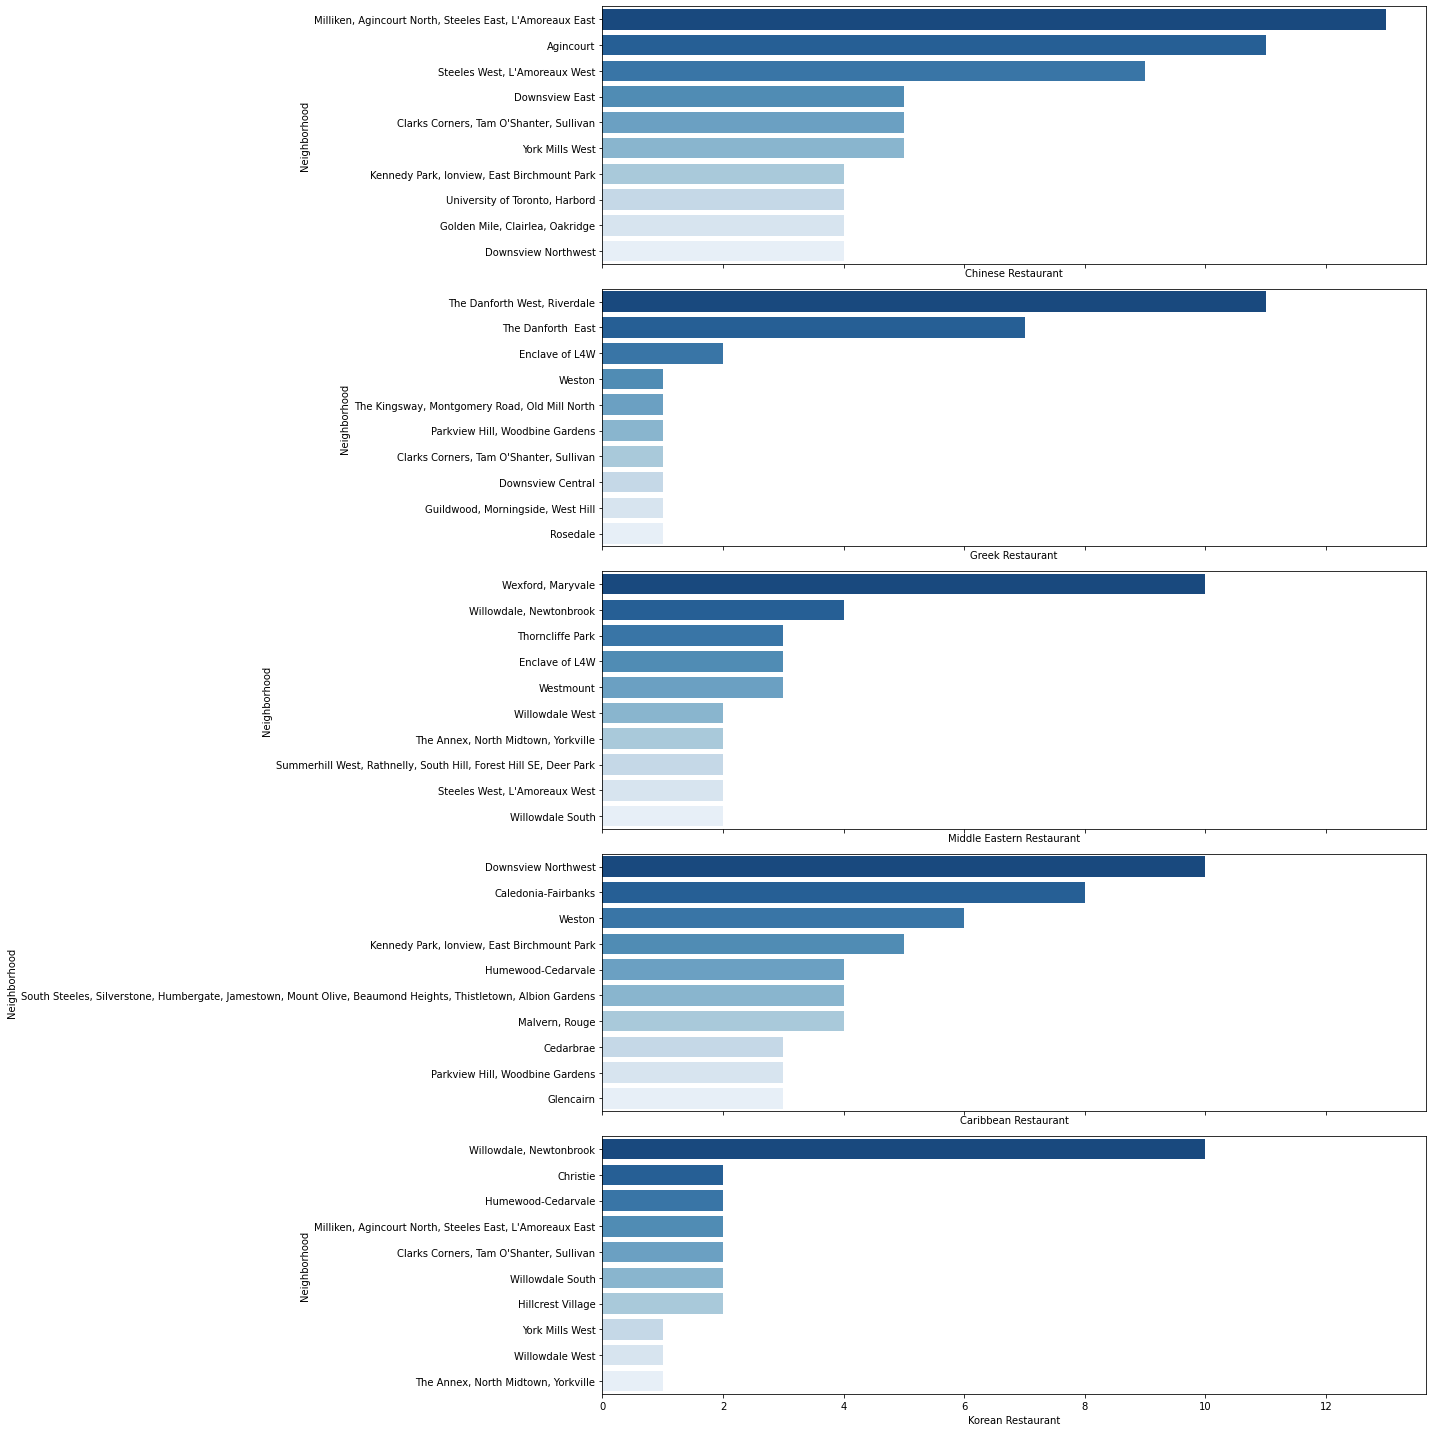

In [ ]:
# plot top 10 restaurant categories for differents neighborhoods

fig, axes =plt.subplots(5, 1, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, toronto_venue_top10_list):
    data = toronto_venues_one_hot_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();
